In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.utils import resample

In [14]:
data = pd.read_csv("Data-Week9.csv")
data.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,Destination,price
0,11/2/2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953
1,11/2/2022,SpiceJet,SG,8157,6:20,Delhi,02h 20m,non-stop,8:40,Mumbai,5953
2,11/2/2022,AirAsia,I5,764,4:25,Delhi,02h 10m,non-stop,6:35,Mumbai,5956
3,11/2/2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955
4,11/2/2022,Vistara,UK,963,8:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955


In [28]:
label_encoder = LabelEncoder()
data['Destination_encoded'] = label_encoder.fit_transform(data['Destination'])
destination_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
destination_mapping

{'Bangalore': 0,
 'Chennai': 1,
 'Delhi': 2,
 'Hyderabad': 3,
 'Kolkata': 4,
 'Mumbai': 5}

In [29]:
unique_destinations = data['Destination_encoded'].nunique()
unique_destinations

6

In [30]:
X = data[['Destination_encoded', 'price']]

kmeans = KMeans(n_clusters=unique_destinations, random_state=42)
kmeans.fit(X)

data['Cluster'] = kmeans.labels_

data.head()

C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,Destination,price,Destination_encoded,Cluster
0,11/2/2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,5,0
1,11/2/2022,SpiceJet,SG,8157,6:20,Delhi,02h 20m,non-stop,8:40,Mumbai,5953,5,0
2,11/2/2022,AirAsia,I5,764,4:25,Delhi,02h 10m,non-stop,6:35,Mumbai,5956,5,0
3,11/2/2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,5,0
4,11/2/2022,Vistara,UK,963,8:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,5,0


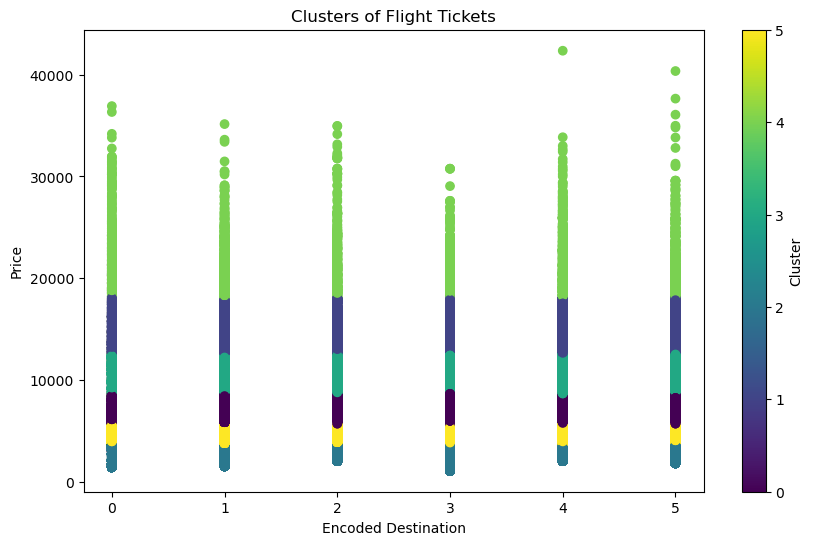

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Destination_encoded'], data['price'], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters of Flight Tickets')
plt.xlabel('Encoded Destination')
plt.ylabel('Price')
plt.colorbar(label='Cluster')
plt.show()

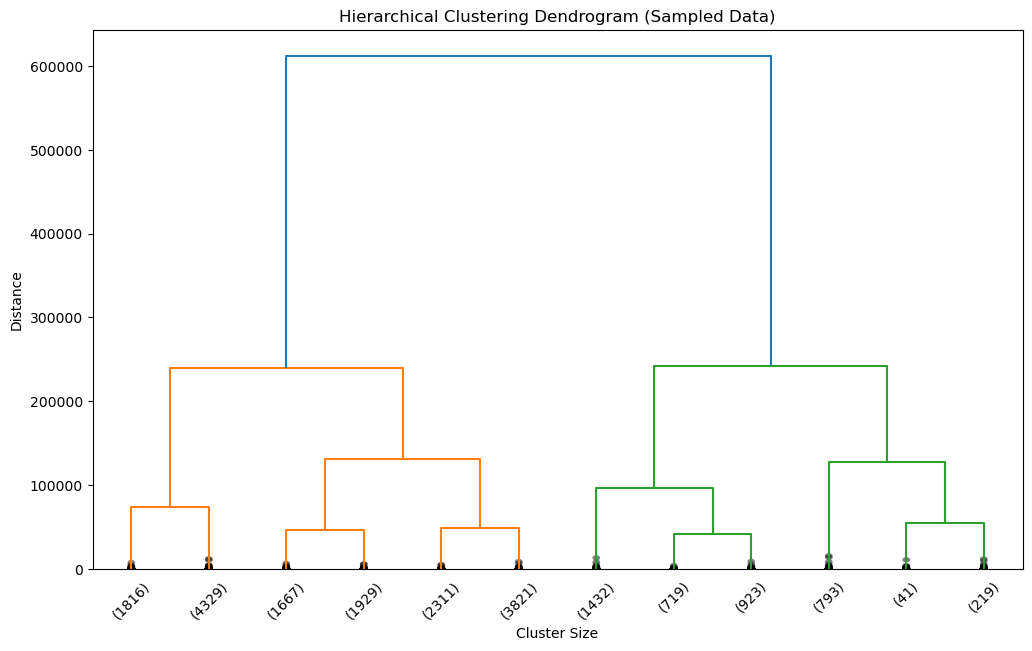

In [27]:
data_sampled = resample(data, n_samples=20000, random_state=42, replace=False)

X_sampled = data_sampled[['Destination_encoded', 'price']]

Z_sampled = linkage(X_sampled, 'ward')

plt.figure(figsize=(12, 7))
dendrogram(Z_sampled, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()